# 2018 1st Semester Methods of Applied Mathematics

# Homework Assignment #5

### 20121229 JunPyo Park

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style(theme='grade3')

## E-R Network Construction

## Tutorial

In [503]:
G=nx.erdos_renyi_graph(5,0.6)

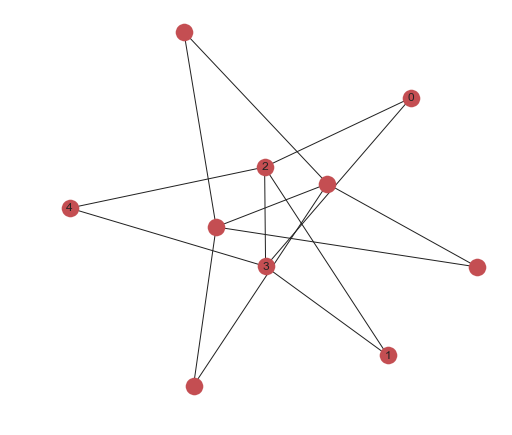

In [504]:
nx.draw(G,with_labels=True)
nx.draw(G)
plt.show()

### Average Shortest Path Length Function

## $a =\sum_{s,t \in V} \frac{d(s, t)}{n(n-1)}$

#### Network X function : average_shortest_path_length(G, weight=None)

In [505]:
nx.average_shortest_path_length(G)

1.3

## Problem 1

In E-R random network, we know that the shortest path length is proportional to log N and the clustering coefficient is approaching to zero, where N is the number of nodes. Provide the experimental result to support such theory.

### Constructing Node_Number array

In [506]:
a = np.arange(9)
num_node = 10 * 2 ** a
num_node

array([  10,   20,   40,   80,  160,  320,  640, 1280, 2560], dtype=int32)

### E-R Network Assumption, average k is constant. Let this value arbitrary to 10

In [507]:
avg_k = 10

### Function ER_avg_short
- input : number of nodes(=num_node)
- output : Average Shortest Path Length of E-R graph with input nodes and following probability

In [508]:
def ER_avg_short(num_node):
    G=nx.erdos_renyi_graph(num_node,avg_k/num_node) # to made Np as a constant
    return nx.average_shortest_path_length(G) # return average_shortest_path_length for G  

#### Get the average short paths for each number of nodes using apply lambda function

In [106]:
avg_short = pd.Series(num_node, index=num_node).apply(lambda x : ER_avg_short(x))
avg_short

10      1.000000
20      1.505263
40      1.834615
80      2.149051
160     2.457154
320     2.734992
640     3.029509
1280    3.373271
2560    3.650540
dtype: float64

### Plot result for average shortest path length

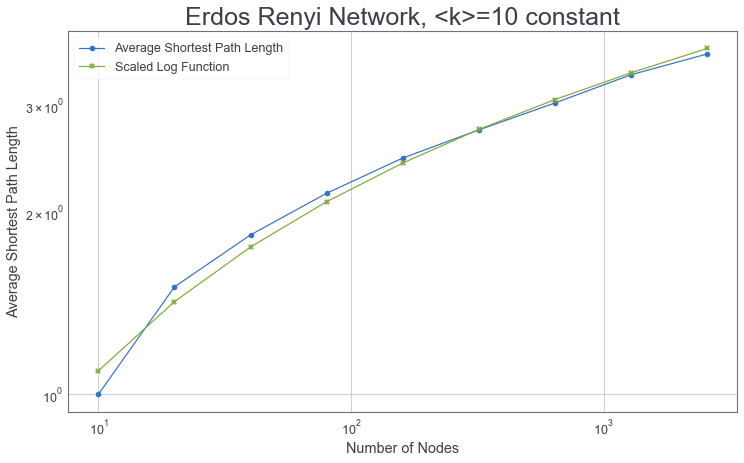

In [515]:
plt.figure(figsize=(12,7))
plt.loglog(avg_short.index, avg_short, basex=10,label = 'Average Shortest Path Length',marker='o')
# plt.plot(avg_short, label = 'Average Shortest Path Length')
plt.plot(avg_short.index, 0.475 * np.log(np.array(avg_short.index)), label = 'Scaled Log Function', marker='X')
plt.title('Erdos Renyi Network, <k>=10 constant',fontsize=25)
plt.xlabel('Number of Nodes')
plt.ylabel('Average Shortest Path Length')
plt.legend()
plt.show()

Green line is the function $y = 0.475 * ln \, N$

### Clutering Coefficient Function

**average_clustering(G, nodes=None, weight=None, count_zeros=True)**

In [112]:
nx.average_clustering(G)

0.009994985840681524

### Function ER_avg_clustering
- input : number of nodes(=num_node)
- output : Average Clustering Coefficient of E-R graph with input nodes and following probability

In [113]:
def ER_avg_clustering(num_node):
    G=nx.erdos_renyi_graph(num_node,avg_k/num_node) # to made Np as a constant
    return nx.average_clustering(G) # return average_clustering_coefficient for G

In [114]:
avg_clustering = pd.Series(num_node, index=num_node).apply(lambda x : ER_avg_clustering(x))
avg_clustering

10      1.000000
20      0.476707
40      0.248836
80      0.128731
160     0.048310
320     0.030949
640     0.014875
1280    0.007210
2560    0.003662
dtype: float64

### Plot result

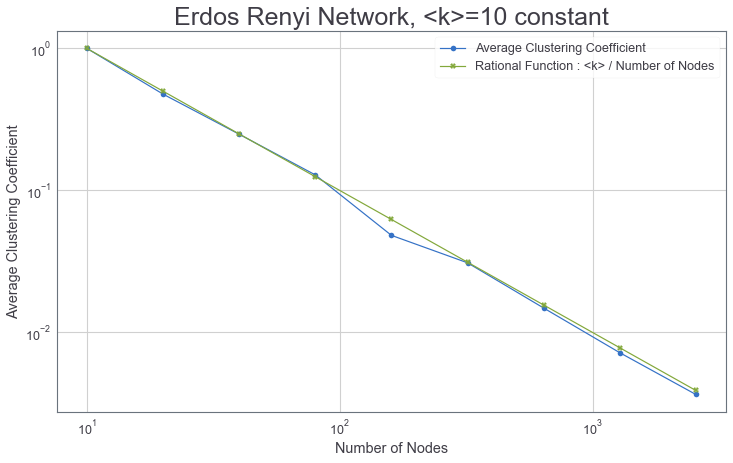

In [516]:
plt.figure(figsize=(12,7))
plt.loglog(avg_clustering.index, avg_clustering, basex=10, label = 'Average Clustering Coefficient',marker='o')
# plt.plot(avg_clustering,label = 'Average Clustering Coefficient')
plt.plot(avg_clustering.index, 10 / avg_clustering.index,label = 'Rational Function : <k> / Number of Nodes',marker='X')
plt.title('Erdos Renyi Network, <k>=10 constant',fontsize=25)
plt.xlabel('Number of Nodes')
plt.ylabel('Average Clustering Coefficient')
plt.legend()
plt.show()

Seems similar to the rational function $y=\frac{<k>}{Number \, of\, Nodes}$

## Problem 2

For the same number of nodes in a E-R network, provide the shortest path length and the clustering coefficinet in the watt-strogatz small world network.

## Watts_Strogatz_Graph Construction

Netwokx Function : connected_watts_strogatz_graph(n, k, p, tries=100, seed=None)

In [474]:
G = nx.connected_watts_strogatz_graph(20,4, 0)

In [475]:
G.edges()

EdgeView([(0, 1), (0, 19), (0, 2), (0, 18), (1, 2), (1, 3), (1, 19), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (5, 7), (6, 7), (6, 8), (7, 8), (7, 9), (8, 9), (8, 10), (9, 10), (9, 11), (10, 11), (10, 12), (11, 12), (11, 13), (12, 13), (12, 14), (13, 14), (13, 15), (14, 15), (14, 16), (15, 16), (15, 17), (16, 17), (16, 18), (17, 18), (17, 19), (18, 19)])

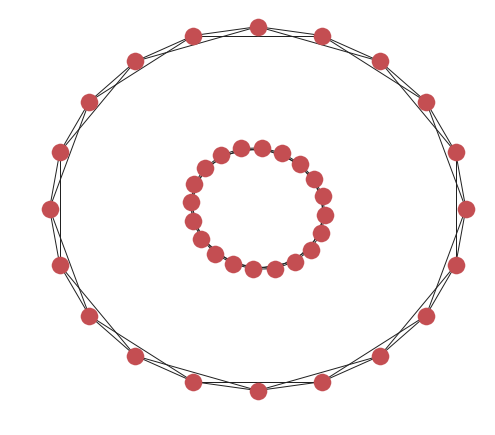

In [476]:
nx.draw(G,pos = nx.circular_layout(G,scale=3))
nx.draw(G)
plt.show()

I'll use same node number(=num_node) and same probabillity(=avg_k / num_node). <br>
Require condition for k are following.

### <center> $ n>>k>>ln(n)>>1 $

### Case I. Constant  $\, k = <k>-1 = np-1 = 9$

In [580]:
def WS_avg_short(num_node):
    G=nx.connected_watts_strogatz_graph(num_node,avg_k-1,avg_k/num_node) # to made Np as a constant
    return nx.average_shortest_path_length(G) # return average_shortest_path_length for G  

In [581]:
def WS_avg_clustering(num_node):
    G=nx.connected_watts_strogatz_graph(num_node,avg_k-1,avg_k/num_node) # to made Np as a constant
    return nx.average_clustering(G) # return average_clustering_coefficient for G

In [582]:
WS_short = pd.Series(num_node, index=num_node).apply(lambda x : WS_avg_short(x))
WS_short

10       1.111111
20       1.589474
40       2.041026
80       2.879430
160      3.824686
320      5.912931
640      8.802083
1280    15.299324
2560    28.714564
dtype: float64

In [583]:
WS_clustering = pd.Series(num_node, index=num_node).apply(lambda x : WS_avg_clustering(x))
WS_clustering

10      0.874603
20      0.388135
40      0.282266
80      0.473671
160     0.525382
320     0.584826
640     0.609674
1280    0.627160
2560    0.633262
dtype: float64

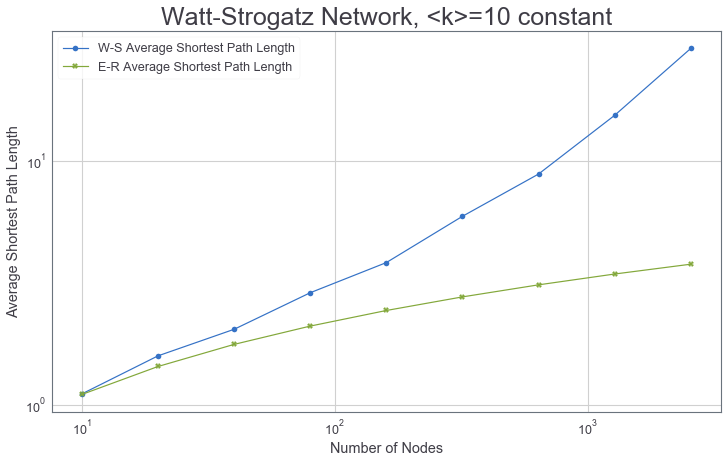

In [584]:
plt.figure(figsize=(12,7))
plt.loglog(WS_short.index, WS_short, basex=10,label = 'W-S Average Shortest Path Length', marker='o')
# plt.plot(WS_short, label = 'W-S Average Shortest Path Length')
plt.plot(WS_short.index, 0.48 * np.log(np.array(WS_short.index)), label = 'E-R Average Shortest Path Length', marker='X')
plt.title('Watt-Strogatz Network, <k>=10 constant',fontsize=25)
plt.xlabel('Number of Nodes')
plt.ylabel('Average Shortest Path Length')
plt.legend()
plt.show()

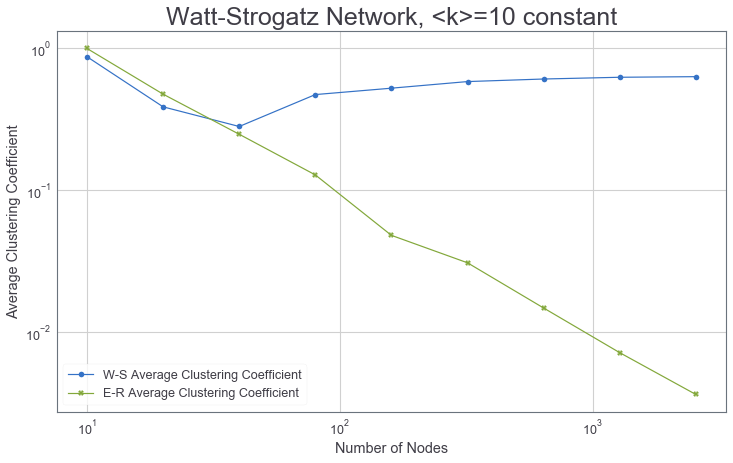

In [585]:
plt.figure(figsize=(12,7))
plt.loglog(WS_clustering.index, WS_clustering, basex=10, label = 'W-S Average Clustering Coefficient',marker='o')
# plt.plot(avg_clustering,label = 'Average Clustering Coefficient')
plt.plot(avg_clustering,label = 'E-R Average Clustering Coefficient',marker='X')
plt.title('Watt-Strogatz Network, <k>=10 constant',fontsize=25)
plt.xlabel('Number of Nodes')
plt.ylabel('Average Clustering Coefficient')
plt.legend()
plt.show()

### Case II. Make the formula for k

### Define k as, $k = int(2*log\,x) - 2$, result are following

In [587]:
# k for each index(=number of nodes)
pd.Series(2 ** np.arange(9) * 10,index=2 ** np.arange(9) * 10).apply(lambda x : int(2 * np.log(x)-2))

10       2
20       3
40       5
80       6
160      8
320      9
640     10
1280    12
2560    13
dtype: int64

In [588]:
def WS_avg_short(num_node):
    G=nx.connected_watts_strogatz_graph(num_node,int(2 * np.log(num_node)-2),avg_k/num_node) # to made Np as a constant
    return nx.average_shortest_path_length(G) # return average_shortest_path_length for G  

In [589]:
def WS_avg_clustering(num_node):
    G=nx.connected_watts_strogatz_graph(num_node,int(2 * np.log(num_node)-2),avg_k/num_node) # to made Np as a constant
    return nx.average_clustering(G) # return average_clustering_coefficient for G

In [590]:
WS_short = pd.Series(num_node, index=num_node).apply(lambda x : WS_avg_short(x))
WS_short

10       3.133333
20       4.163158
40       2.994872
80       3.137975
160      4.021148
320      5.616575
640      7.194464
1280     9.142780
2560    15.189264
dtype: float64

In [591]:
WS_clustering = pd.Series(num_node, index=num_node).apply(lambda x : WS_avg_clustering(x))
WS_clustering

10      0.000000
20      0.083333
40      0.215833
80      0.400655
160     0.571850
320     0.593170
640     0.636992
1280    0.666007
2560    0.675749
dtype: float64

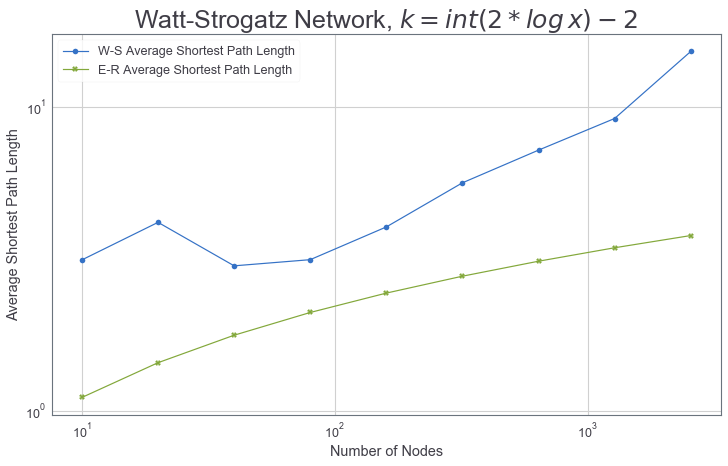

In [595]:
plt.figure(figsize=(12,7))
plt.loglog(WS_short.index, WS_short, basex=10,label = 'W-S Average Shortest Path Length', marker='o')
# plt.plot(WS_short, label = 'W-S Average Shortest Path Length')
plt.plot(WS_short.index, 0.48 * np.log(np.array(WS_short.index)), label = 'E-R Average Shortest Path Length', marker='X')
plt.title('Watt-Strogatz Network, $k = int(2*log\,x) - 2$',fontsize=25)
plt.xlabel('Number of Nodes')
plt.ylabel('Average Shortest Path Length')
plt.legend()
plt.show()

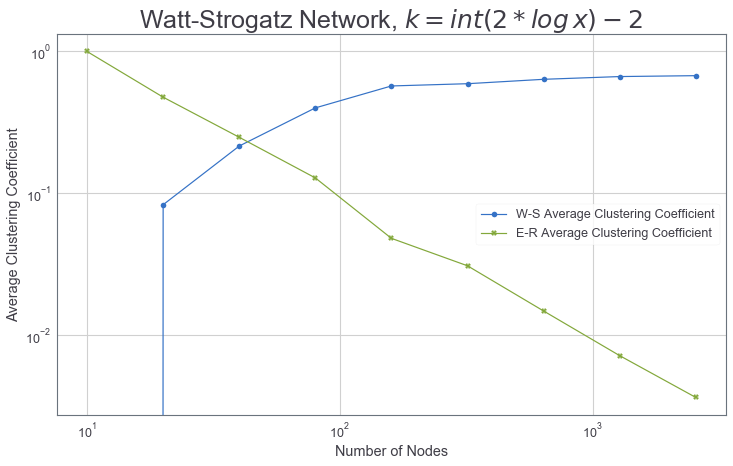

In [596]:
plt.figure(figsize=(12,7))
plt.loglog(WS_clustering.index, WS_clustering, basex=10, label = 'W-S Average Clustering Coefficient',marker='o')
# plt.plot(avg_clustering,label = 'Average Clustering Coefficient')
plt.plot(avg_clustering,label = 'E-R Average Clustering Coefficient',marker='X')
plt.title('Watt-Strogatz Network, $k = int(2*log\,x) - 2$',fontsize=25)
plt.xlabel('Number of Nodes')
plt.ylabel('Average Clustering Coefficient')
plt.legend()
plt.show()

## Problem 3

### Required Condition : $ n>>k>>ln(n)>>1 $

I follow the paper D.J. Watts and S. Strogatz, "Collective Dynamics of 'small-world' networks" <br>
Their setting is n=1000 and k = 10

In [599]:
num_node = 1000
k = 10

To find appropriate parameters for p(x), solve the following equations.

$a^{x+20} = 0.00001$ <br> $a^{x} = 1$

We know x = 0 and $a=(0.00001) ^ {1/20}$

In [434]:
a = 0.00001 ** (1/20)

In [435]:
p = a ** np.arange(20)
p

array([1.00000000e+00, 5.62341325e-01, 3.16227766e-01, 1.77827941e-01,
       1.00000000e-01, 5.62341325e-02, 3.16227766e-02, 1.77827941e-02,
       1.00000000e-02, 5.62341325e-03, 3.16227766e-03, 1.77827941e-03,
       1.00000000e-03, 5.62341325e-04, 3.16227766e-04, 1.77827941e-04,
       1.00000000e-04, 5.62341325e-05, 3.16227766e-05, 1.77827941e-05])

In [436]:
p = p[::-1]
p

array([1.77827941e-05, 3.16227766e-05, 5.62341325e-05, 1.00000000e-04,
       1.77827941e-04, 3.16227766e-04, 5.62341325e-04, 1.00000000e-03,
       1.77827941e-03, 3.16227766e-03, 5.62341325e-03, 1.00000000e-02,
       1.77827941e-02, 3.16227766e-02, 5.62341325e-02, 1.00000000e-01,
       1.77827941e-01, 3.16227766e-01, 5.62341325e-01, 1.00000000e+00])

In [445]:
def WS_avg_short(p):
    G=nx.watts_strogatz_graph(num_node,k,p) # to made Np as a constant
    return nx.average_shortest_path_length(G) # return average_shortest_path_length for G  

In [446]:
def WS_avg_clustering(p):
    G=nx.watts_strogatz_graph(num_node,k,p) # to made Np as a constant
    return nx.average_clustering(G) # return average_clustering_coefficient for G

In [447]:
WS_short = pd.Series(p, index=p).apply(lambda x : WS_avg_short(x))
WS_short

0.000018    50.450450
0.000032    50.450450
0.000056    50.450450
0.000100    50.450450
0.000178    46.393025
0.000316    39.801449
0.000562    35.933127
0.001000    23.048304
0.001778    20.540102
0.003162    17.283205
0.005623    12.175119
0.010000     8.538026
0.017783     7.005055
0.031623     5.830819
0.056234     5.117345
0.100000     4.417918
0.177828     3.994300
0.316228     3.570060
0.562341     3.347788
1.000000     3.267201
dtype: float64

To get the value L(p)/L(0) devide it with first value

In [448]:
scaled_WS_short = WS_short / WS_short.iloc[0]

In [449]:
scaled_WS_short

0.000018    1.000000
0.000032    1.000000
0.000056    1.000000
0.000100    1.000000
0.000178    0.919576
0.000316    0.788922
0.000562    0.712246
0.001000    0.456850
0.001778    0.407134
0.003162    0.342578
0.005623    0.241328
0.010000    0.169236
0.017783    0.138850
0.031623    0.115575
0.056234    0.101433
0.100000    0.087569
0.177828    0.079173
0.316228    0.070764
0.562341    0.066358
1.000000    0.064761
dtype: float64

In [450]:
WS_clustering = pd.Series(p, index=p).apply(lambda x : WS_avg_clustering(x))
WS_clustering

0.000018    0.666667
0.000032    0.666134
0.000056    0.666667
0.000100    0.666667
0.000178    0.666667
0.000316    0.666134
0.000562    0.665073
0.001000    0.664975
0.001778    0.663609
0.003162    0.660081
0.005623    0.653638
0.010000    0.648842
0.017783    0.633056
0.031623    0.612338
0.056234    0.567059
0.100000    0.479765
0.177828    0.381620
0.316228    0.224354
0.562341    0.056534
1.000000    0.010044
dtype: float64

To get the value C(p)/C(0) devide it with first value

In [451]:
scaled_WS_clustering = WS_clustering / WS_clustering.iloc[0]
scaled_WS_clustering

0.000018    1.000000
0.000032    0.999202
0.000056    1.000000
0.000100    1.000000
0.000178    1.000000
0.000316    0.999202
0.000562    0.997610
0.001000    0.997462
0.001778    0.995414
0.003162    0.990121
0.005623    0.980457
0.010000    0.973264
0.017783    0.949584
0.031623    0.918507
0.056234    0.850588
0.100000    0.719648
0.177828    0.572430
0.316228    0.336530
0.562341    0.084800
1.000000    0.015066
dtype: float64

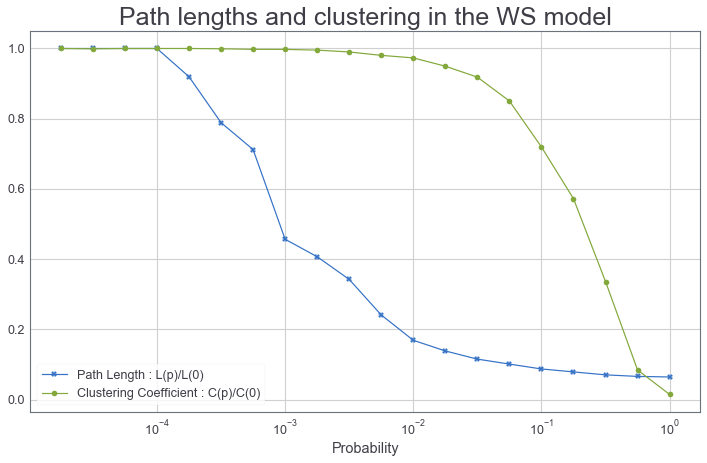

In [598]:
fig, ax = plt.subplots(figsize=(12,7))
ax.semilogx(p, scaled_WS_short, label = 'Path Length : L(p)/L(0)', marker = 'X')
ax.semilogx(p, scaled_WS_clustering, label = 'Clustering Coefficient : C(p)/C(0)', marker = 'o')
plt.title('Path lengths and clustering in the WS model',fontsize=25)
plt.xlabel('Probability')
plt.legend()
plt.show()

## Problem 4

Barabasi & Albert suggested the scale-free network which has a special property, the power law distribution. You can generate a B-A scale-free graph by using barabasi_albert_graph(n,m) in python made code. Provide an experimental result of B-A graph to have a power distribution with the exponent between 2 and 3.

In [21]:
G = nx.barabasi_albert_graph(200000,2)

In [22]:
degree_list = list(G.degree)

In [23]:
df = pd.DataFrame(degree_list, columns = ['degree','number'])
df.head()

,degree,number
0,0,766
1,1,754
2,2,514
3,3,244
4,4,356


In [24]:
df['prob'] = df['number'] / df['number'].sum()

In [51]:
df.head()

,degree,number,prob
0,0,766,0.000958
1,1,754,0.000943
2,2,514,0.000643
3,3,244,0.000305
4,4,356,0.000445


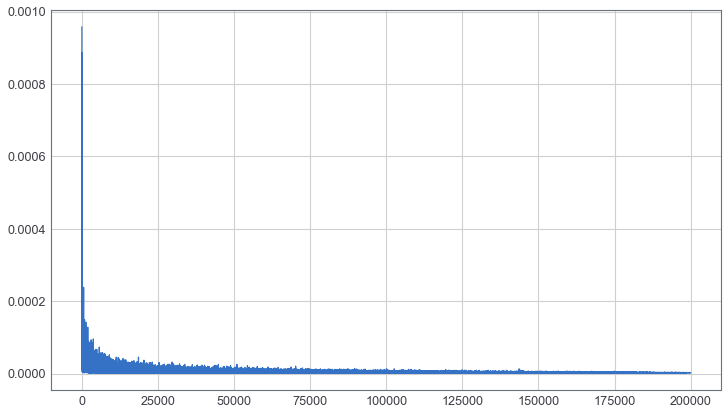

In [50]:
plt.figure(figsize=(12,7))
plt.plot(df['prob'])
plt.show()

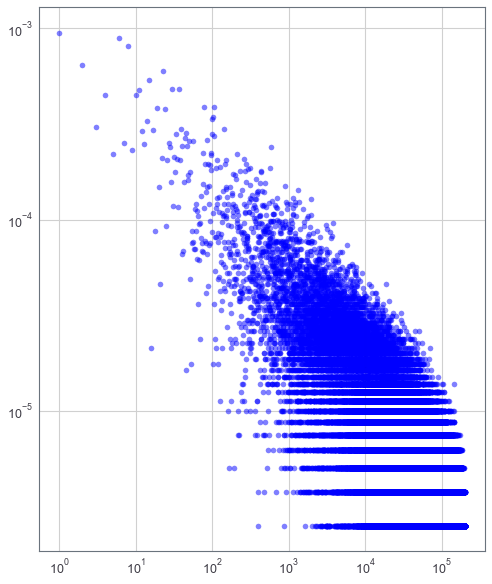

In [27]:
fig = plt.figure(figsize=(8,10))
ax = plt.gca()
ax.plot(df['degree'] ,df['prob'], 'o', c='blue', alpha=0.5, markeredgecolor='none')
ax.set_yscale('log')
ax.set_xscale('log')

In [52]:
log_x = np.log10(np.array(df['degree'][1:])) # ignore the degree 0
log_y = np.matrix(np.log10(np.array(df['prob'][1:]))).T # ignore the degree 0

In [55]:
ones = np.ones(len(log_x))
x = np.vstack((ones,log_x)).T
x = np.matrix(x)
x

matrix([[1.        , 0.        ],
        [1.        , 0.30103   ],
        [1.        , 0.47712125],
        ...,
        [1.        , 5.30102348],
        [1.        , 5.30102565],
        [1.        , 5.30102782]])

### Using Least Square fit(=simple linear regression) formula to calculate the coefficient

### <center> $\beta = (X^TX)^{-1}(X^TY)$

In [54]:
# Calculating Simple Regression Coefficient
beta = np.linalg.inv(x.T*x) * (x.T * log_y)
beta

matrix([[-3.24510902],
        [-0.4462214 ]])

In [78]:
gamma = 1/0.4462214
gamma

2.241039985980054

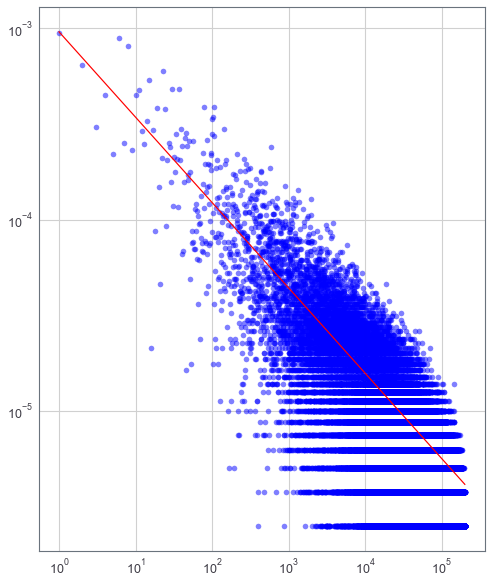

In [81]:
fig = plt.figure(figsize=(8,10))
ax = plt.gca()
ax.plot(df['degree'] ,df['prob'], 'o', c='blue', alpha=0.5, markeredgecolor='none')
ax.plot(df['prob'].iloc[0]/(df.index) ** (1/gamma), c ='red')
ax.set_yscale('log')
ax.set_xscale('log')